# 1 (b)


In [1]:
import numpy as np
import util

In [6]:
def main(train_path, valid_path, save_path):
    """Problem: Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Train a logistic regression classifier
    clf = LogisticRegression()
    clf.fit(x_train, y_train)

    # Plot decision boundary on top of validation set set
    x_eval, y_eval = util.load_dataset(valid_path, add_intercept=True)
    plot_path = save_path.replace('.txt', '.png')
    util.plot(x_eval, y_eval, clf.theta, plot_path)

    # Use np.savetxt to save predictions on eval set to save_path
    p_eval = clf.predict(x_eval)
    yhat = p_eval > 0.5
    print('LR Accuracy: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
    np.savetxt(save_path, p_eval)
    # *** END CODE HERE ***


In [5]:
class LogisticRegression:
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n, dtype=np.float32)

        for i in range(self.max_iter):
            grad = self._gradient(x, y)
            hess = self._hessian(x)

            prev_theta = np.copy(self.theta)
            self.theta -= self.step_size * np.linalg.inv(hess).dot(grad)

            loss = self._loss(x, y)
            if self.verbose:
                print('[iter: {:02d}, loss: {:.7f}]'.format(i, loss))

            if np.sum(np.abs(prev_theta - self.theta)) < self.eps:
                break

        if self.verbose:
            print('Final theta (logreg): {}'.format(self.theta))
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        y_hat = self._sigmoid(x.dot(self.theta))

        return y_hat
        # *** END CODE HERE ***
    def _gradient(self, x, y):
        """Get gradient of J.

        Returns:
            grad: The gradient of J with respect to theta. Same shape as theta.
        """
        m, _ = x.shape

        probs = self._sigmoid(x.dot(self.theta))
        grad = 1 / m * x.T.dot(probs - y)

        return grad
    
    def _hessian(self, x):
        """Get the Hessian of J given theta and x.

        Returns:
            hess: The Hessian of J. Shape (dim, dim), where dim is dimension of theta.
        """
        m, _ = x.shape

        probs = self._sigmoid(x.dot(self.theta))
        diag = np.diag(probs * (1. - probs))
        hess = 1 / m * x.T.dot(diag).dot(x)

        return hess
    
    def _loss(self,x,y):
        hx = self._sigmoid(x.dot(self.theta))
        loss = -np.mean(y * np.log(hx + self.eps) + (1 - y) * np.log(1 - hx + self.eps))
        return loss
    
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
        
if __name__ == '__main__':
    main(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='logreg_pred_1.txt')

    main(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='logreg_pred_2.txt')

[iter: 00, loss: 0.6891724]
[iter: 01, loss: 0.6852958]
[iter: 02, loss: 0.6814951]
[iter: 03, loss: 0.6777678]
[iter: 04, loss: 0.6741119]
[iter: 05, loss: 0.6705250]
[iter: 06, loss: 0.6670053]
[iter: 07, loss: 0.6635508]
[iter: 08, loss: 0.6601596]
[iter: 09, loss: 0.6568298]
[iter: 10, loss: 0.6535600]
[iter: 11, loss: 0.6503482]
[iter: 12, loss: 0.6471931]
[iter: 13, loss: 0.6440930]
[iter: 14, loss: 0.6410465]
[iter: 15, loss: 0.6380523]
[iter: 16, loss: 0.6351089]
[iter: 17, loss: 0.6322151]
[iter: 18, loss: 0.6293695]
[iter: 19, loss: 0.6265711]
[iter: 20, loss: 0.6238187]
[iter: 21, loss: 0.6211111]
[iter: 22, loss: 0.6184472]
[iter: 23, loss: 0.6158260]
[iter: 24, loss: 0.6132466]
[iter: 25, loss: 0.6107079]
[iter: 26, loss: 0.6082090]
[iter: 27, loss: 0.6057489]
[iter: 28, loss: 0.6033269]
[iter: 29, loss: 0.6009421]
[iter: 30, loss: 0.5985935]
[iter: 31, loss: 0.5962806]
[iter: 32, loss: 0.5940024]
[iter: 33, loss: 0.5917582]
[iter: 34, loss: 0.5895473]
[iter: 35, loss: 0.5

[iter: 299, loss: 0.4109062]
[iter: 300, loss: 0.4108188]
[iter: 301, loss: 0.4107328]
[iter: 302, loss: 0.4106481]
[iter: 303, loss: 0.4105647]
[iter: 304, loss: 0.4104827]
[iter: 305, loss: 0.4104019]
[iter: 306, loss: 0.4103224]
[iter: 307, loss: 0.4102442]
[iter: 308, loss: 0.4101672]
[iter: 309, loss: 0.4100914]
[iter: 310, loss: 0.4100168]
[iter: 311, loss: 0.4099435]
[iter: 312, loss: 0.4098712]
[iter: 313, loss: 0.4098002]
[iter: 314, loss: 0.4097302]
[iter: 315, loss: 0.4096614]
[iter: 316, loss: 0.4095937]
[iter: 317, loss: 0.4095271]
[iter: 318, loss: 0.4094615]
[iter: 319, loss: 0.4093970]
[iter: 320, loss: 0.4093336]
[iter: 321, loss: 0.4092712]
[iter: 322, loss: 0.4092098]
[iter: 323, loss: 0.4091493]
[iter: 324, loss: 0.4090899]
[iter: 325, loss: 0.4090315]
[iter: 326, loss: 0.4089740]
[iter: 327, loss: 0.4089174]
[iter: 328, loss: 0.4088618]
[iter: 329, loss: 0.4088070]
[iter: 330, loss: 0.4087532]
[iter: 331, loss: 0.4087003]
[iter: 332, loss: 0.4086482]
[iter: 333, lo

[iter: 611, loss: 0.4057551]
[iter: 612, loss: 0.4057548]
[iter: 613, loss: 0.4057545]
[iter: 614, loss: 0.4057543]
[iter: 615, loss: 0.4057540]
[iter: 616, loss: 0.4057538]
[iter: 617, loss: 0.4057535]
[iter: 618, loss: 0.4057533]
[iter: 619, loss: 0.4057530]
[iter: 620, loss: 0.4057528]
[iter: 621, loss: 0.4057526]
[iter: 622, loss: 0.4057524]
[iter: 623, loss: 0.4057522]
[iter: 624, loss: 0.4057519]
[iter: 625, loss: 0.4057517]
[iter: 626, loss: 0.4057515]
[iter: 627, loss: 0.4057513]
[iter: 628, loss: 0.4057511]
[iter: 629, loss: 0.4057509]
[iter: 630, loss: 0.4057508]
[iter: 631, loss: 0.4057506]
[iter: 632, loss: 0.4057504]
[iter: 633, loss: 0.4057502]
[iter: 634, loss: 0.4057500]
[iter: 635, loss: 0.4057499]
[iter: 636, loss: 0.4057497]
[iter: 637, loss: 0.4057495]
[iter: 638, loss: 0.4057494]
[iter: 639, loss: 0.4057492]
[iter: 640, loss: 0.4057491]
[iter: 641, loss: 0.4057489]
[iter: 642, loss: 0.4057488]
[iter: 643, loss: 0.4057486]
[iter: 644, loss: 0.4057485]
[iter: 645, lo

[iter: 917, loss: 0.4057414]
[iter: 918, loss: 0.4057414]
[iter: 919, loss: 0.4057414]
[iter: 920, loss: 0.4057414]
[iter: 921, loss: 0.4057414]
[iter: 922, loss: 0.4057414]
[iter: 923, loss: 0.4057414]
[iter: 924, loss: 0.4057414]
[iter: 925, loss: 0.4057414]
[iter: 926, loss: 0.4057414]
[iter: 927, loss: 0.4057414]
[iter: 928, loss: 0.4057414]
[iter: 929, loss: 0.4057414]
[iter: 930, loss: 0.4057414]
[iter: 931, loss: 0.4057414]
[iter: 932, loss: 0.4057414]
[iter: 933, loss: 0.4057414]
[iter: 934, loss: 0.4057414]
[iter: 935, loss: 0.4057414]
[iter: 936, loss: 0.4057414]
[iter: 937, loss: 0.4057414]
[iter: 938, loss: 0.4057414]
[iter: 939, loss: 0.4057414]
Final theta (logreg): [-2.4078467   1.0343113   0.24463071]
LR Accuracy: 0.83
[iter: 00, loss: 0.6893788]
[iter: 01, loss: 0.6857046]
[iter: 02, loss: 0.6821025]
[iter: 03, loss: 0.6785703]
[iter: 04, loss: 0.6751060]
[iter: 05, loss: 0.6717077]
[iter: 06, loss: 0.6683736]
[iter: 07, loss: 0.6651019]
[iter: 08, loss: 0.6618908]
[it

[iter: 267, loss: 0.4628329]
[iter: 268, loss: 0.4627809]
[iter: 269, loss: 0.4627299]
[iter: 270, loss: 0.4626798]
[iter: 271, loss: 0.4626306]
[iter: 272, loss: 0.4625822]
[iter: 273, loss: 0.4625347]
[iter: 274, loss: 0.4624881]
[iter: 275, loss: 0.4624422]
[iter: 276, loss: 0.4623972]
[iter: 277, loss: 0.4623531]
[iter: 278, loss: 0.4623097]
[iter: 279, loss: 0.4622670]
[iter: 280, loss: 0.4622252]
[iter: 281, loss: 0.4621841]
[iter: 282, loss: 0.4621437]
[iter: 283, loss: 0.4621040]
[iter: 284, loss: 0.4620651]
[iter: 285, loss: 0.4620269]
[iter: 286, loss: 0.4619893]
[iter: 287, loss: 0.4619524]
[iter: 288, loss: 0.4619162]
[iter: 289, loss: 0.4618807]
[iter: 290, loss: 0.4618458]
[iter: 291, loss: 0.4618115]
[iter: 292, loss: 0.4617778]
[iter: 293, loss: 0.4617448]
[iter: 294, loss: 0.4617123]
[iter: 295, loss: 0.4616805]
[iter: 296, loss: 0.4616492]
[iter: 297, loss: 0.4616185]
[iter: 298, loss: 0.4615883]
[iter: 299, loss: 0.4615587]
[iter: 300, loss: 0.4615296]
[iter: 301, lo

[iter: 577, loss: 0.4600148]
[iter: 578, loss: 0.4600146]
[iter: 579, loss: 0.4600145]
[iter: 580, loss: 0.4600144]
[iter: 581, loss: 0.4600143]
[iter: 582, loss: 0.4600141]
[iter: 583, loss: 0.4600140]
[iter: 584, loss: 0.4600139]
[iter: 585, loss: 0.4600138]
[iter: 586, loss: 0.4600137]
[iter: 587, loss: 0.4600136]
[iter: 588, loss: 0.4600135]
[iter: 589, loss: 0.4600134]
[iter: 590, loss: 0.4600133]
[iter: 591, loss: 0.4600132]
[iter: 592, loss: 0.4600131]
[iter: 593, loss: 0.4600130]
[iter: 594, loss: 0.4600129]
[iter: 595, loss: 0.4600128]
[iter: 596, loss: 0.4600127]
[iter: 597, loss: 0.4600126]
[iter: 598, loss: 0.4600125]
[iter: 599, loss: 0.4600124]
[iter: 600, loss: 0.4600123]
[iter: 601, loss: 0.4600123]
[iter: 602, loss: 0.4600122]
[iter: 603, loss: 0.4600121]
[iter: 604, loss: 0.4600120]
[iter: 605, loss: 0.4600119]
[iter: 606, loss: 0.4600119]
[iter: 607, loss: 0.4600118]
[iter: 608, loss: 0.4600117]
[iter: 609, loss: 0.4600117]
[iter: 610, loss: 0.4600116]
[iter: 611, lo

[iter: 877, loss: 0.4600082]
[iter: 878, loss: 0.4600082]
[iter: 879, loss: 0.4600082]
[iter: 880, loss: 0.4600082]
[iter: 881, loss: 0.4600082]
[iter: 882, loss: 0.4600082]
[iter: 883, loss: 0.4600082]
[iter: 884, loss: 0.4600082]
[iter: 885, loss: 0.4600082]
[iter: 886, loss: 0.4600082]
[iter: 887, loss: 0.4600082]
[iter: 888, loss: 0.4600082]
[iter: 889, loss: 0.4600082]
[iter: 890, loss: 0.4600082]
[iter: 891, loss: 0.4600082]
[iter: 892, loss: 0.4600082]
[iter: 893, loss: 0.4600082]
[iter: 894, loss: 0.4600082]
[iter: 895, loss: 0.4600082]
[iter: 896, loss: 0.4600082]
[iter: 897, loss: 0.4600082]
[iter: 898, loss: 0.4600082]
[iter: 899, loss: 0.4600082]
[iter: 900, loss: 0.4600082]
[iter: 901, loss: 0.4600082]
[iter: 902, loss: 0.4600082]
[iter: 903, loss: 0.4600082]
[iter: 904, loss: 0.4600082]
[iter: 905, loss: 0.4600082]
[iter: 906, loss: 0.4600082]
[iter: 907, loss: 0.4600082]
Final theta (logreg): [-2.0967324  0.8663494  0.828187 ]
LR Accuracy: 0.86


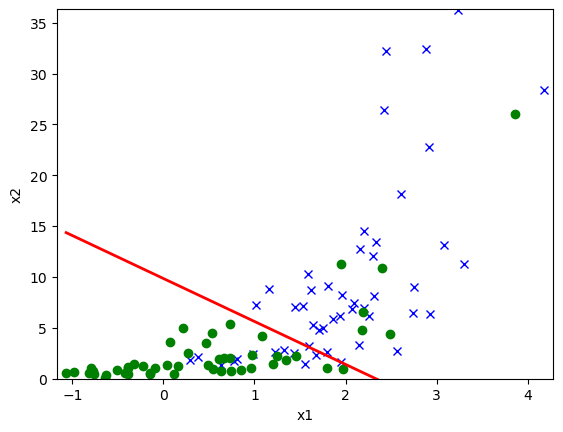

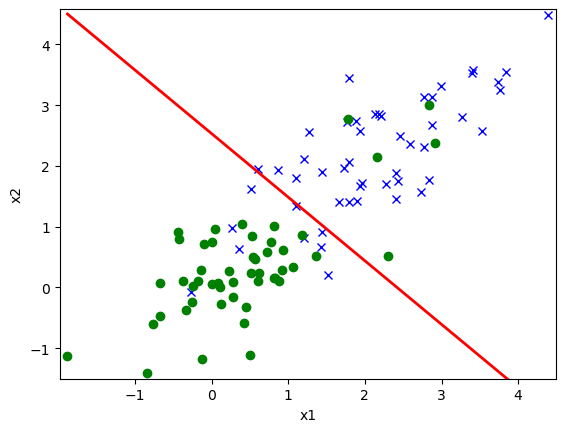

In [7]:
if __name__ == '__main__':
    main(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='logreg_pred_1.txt')

    main(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='logreg_pred_2.txt')